# Experiment 2

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.interpolate import interp1d

In [67]:
m_initial = 0
m_final = np.array([0,
10,
20,
30,
40,
50,
60,
70,
80,
90,
100,
110,
120,
130,
140,
150,160,170,180,190,200
])


h_initial = np.array([58.5,
58.5,
58.5,
57,
57,
56.5,
56,
55.5,
54.5,
53,
52,
52,
50.5,
50,
49,
48.5,
47.5,
46.5,
46,
45,
45
])

h_final = np.array([58.5,
58.0,
57.5,
56.5,
55.5,
55,
54.5,
53,
51,
50,
49.5,
48.5,
47,
46,
45.5,
45,
43.5,
42.5,
41,
40.5,
40

])

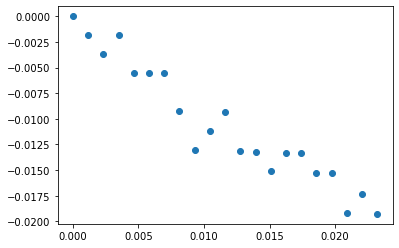

In [76]:
p_piston = 101325 + (0.0485 * 9.81/0.0008295) # mass of pison/area in square meters

#Additional pressure exerted by the masses
pressure_mass = (m_final * 9.81/1000)/0.0008295

# Calculation of delta P and P
total_P = pressure_mass + p_piston
deltaP = total_P - p_piston

v_canister = (171.7 + 6.2)/10**6

v_initial = np.pi * (32.5/2000)**2 * h_initial/1000 + v_canister
v_final = np.pi * (32.5/2000)**2 * h_final/1000 + v_canister

deltaV = v_final - v_initial

dp_p = deltaP/p_piston
dv_v = deltaV/v_initial

plt.scatter(deltaP/p_piston, deltaV/v_initial)
plt.show()

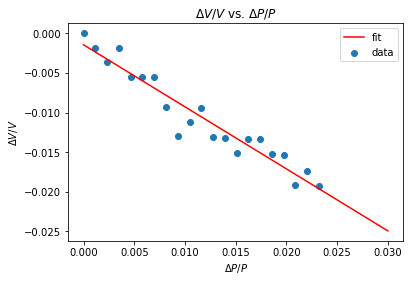

Fitted curve: -0.7824106518527622 ± 0.05162477278404324, -0.001457497288417181 ± 0.0007004448442633205


In [85]:
def linear(x, m, b):
    return m*x + b


lin, cov = opt.curve_fit(linear, dp_p, dv_v)
m, b = lin 
dm, db = np.sqrt(np.diag(cov))

plt.plot(np.linspace(0, 0.03, 10), linear(np.linspace(0, 0.03, 10), m, b), c = 'r', label="fit") 
plt.scatter(dp_p, dv_v, label='data') 
plt.title("$\Delta V/V$ vs. $\Delta P/P$")
plt.xlabel("$\Delta P/P$")
plt.ylabel("$\Delta V/V$")
plt.legend()
plt.show()

print(f"Fitted curve: {m} ± {dm}, {b} ± {db}")

## Finding the Errors

In [69]:
def alpha_v(d: float, h: float, alphad: float, alphah: float):
    return np.sqrt((np.pi * (d/2)**2 * alphah)**2 + (2 * d * alphad/4 * np.pi * h)**2)

In [70]:
# alpha_can = np.sqrt((np.pi * (0.0462/2)**2 * 0.0003)**2 + (2 * 0.0462 * 0.0002/4 * np.pi * 0.1024)**2)
# alpha_tube = np.sqrt((np.pi * (0.0035/2)**2 * 0.0001)**2 + (2 * 0.0035 * 0.0002/4 * np.pi * 0.638)**2)
# alpha_piston_final = np.sqrt((np.pi * (0.00325/2)**2 * 0.00005)**2 + (2 * 0.0325 * 0.0001/4 * np.pi * h_final) ** 2)
# alpha_piston_initial = np.sqrt((np.pi * (0.00325/2)**2 * 0.00005)**2 + (2 * 0.0325 * 0.0001/4 * np.pi * h_initial) ** 2)

alpha_p = np.sqrt((0.001/(np.pi * (0.00325/2)**2) * (9.8/1000))**2 + (m_final/1000 * 9.8 * (np.pi * 2 * 0.00325 * 0.0001/4)/(np.pi * (0.00325/2)**2)**2)**2)

alpha_can = alpha_v(0.0462, 0.1024, 0.0002, 0.003)
alpha_tube = alpha_v(0.0035, 0.638, 0.00001, 0.0001)
alpha_piston_final = alpha_v(0.0325, h_final/1000, 0.0001, 0.00005)
alpha_piston_initial = alpha_v(0.0325, h_initial/1000, 0.0001, 0.00005)



alpha_v_tot_initial = np.sqrt(alpha_piston_initial**2)
alpha_v_tot_final = np.sqrt(alpha_piston_final**2)

alpha_dv_v = np.sqrt((alpha_v_tot_initial/(v_initial**2) * v_final)**2 + (alpha_v_tot_final/v_initial)**2)
alpha_dp_p = alpha_p/101897.996

In [75]:
slope = -0.7833

alpha_equiv = np.sqrt(alpha_dv_v**2 + (slope * alpha_dp_p)**2)

# print(alpha_v_tot_initial)
# print(alpha_v_tot_final)

# print(alpha_piston_initial)
print(slope*alpha_dp_p)

# print(alpha_equiv)

[-9.08096404e-06 -5.58829294e-03 -1.11765748e-02 -1.67648592e-02
 -2.23531441e-02 -2.79414293e-02 -3.35297146e-02 -3.91180000e-02
 -4.47062854e-02 -5.02945709e-02 -5.58828564e-02 -6.14711419e-02
 -6.70594274e-02 -7.26477129e-02 -7.82359984e-02 -8.38242840e-02
 -8.94125695e-02 -9.50008550e-02 -1.00589141e-01 -1.06177426e-01
 -1.11765712e-01]


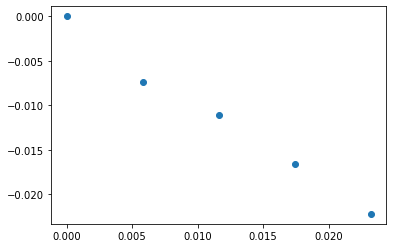

In [88]:
m_outside = np.array([0, 50, 100, 150, 200])
h2_initial = np.array([58.5, 58.5, 57.5, 56.5, 56])
h2_final = np.array([58.5,  56.5, 54.5, 52, 50])


pressure_out2 = (m_outside * 9.81/1000)/0.0008295

# Calculation of delta P and P
total_P2 = pressure_out2 + p_piston
deltaP2 = total_P2 - p_piston

v2_initial = np.pi * (32.5/2000)**2 * h2_initial/1000 + v_canister
v2_final = np.pi * (32.5/2000)**2 * h2_final/1000 + v_canister

deltaV2 = v2_final - v2_initial

dp_p2 = deltaP2/p_piston
dv_v2 = deltaV2/v2_initial

plt.scatter(deltaP2/p_piston, deltaV2/v2_initial)
plt.show()

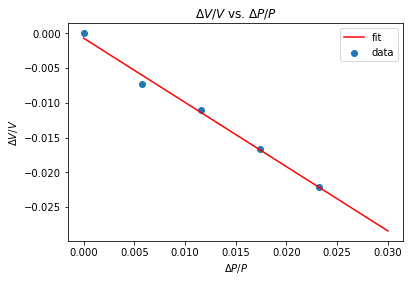

Fitted curve: -0.9245527317701635 ± 0.04748505217620032, -0.0007001864152988696 ± 0.0006749740086321093


In [90]:
lin2, cov2 = opt.curve_fit(linear, dp_p2, dv_v2)
m2, b2 = lin2 
dm2, db2 = np.sqrt(np.diag(cov2))

plt.plot(np.linspace(0, 0.03, 10), linear(np.linspace(0, 0.03, 10), m2, b2), c = 'r', label="fit") 
plt.scatter(dp_p2, dv_v2, label='data') 
plt.title("$\Delta V/V$ vs. $\Delta P/P$")
plt.xlabel("$\Delta P/P$")
plt.ylabel("$\Delta V/V$")
plt.legend()
plt.show()


print(f"Fitted curve: {m2} ± {dm2}, {b2} ± {db2}")